In [1]:
%load_ext rpy2.ipython
# Turning on in-IPy R capabilities

In [2]:
%%R
library(phyloseq)
library(doParallel)
library(ggplot2)
library(vegan)
library(RColorBrewer)
library(plyr)
library(gridExtra)

Loading required package: foreach
foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loading required package: iterators
Loading required package: parallel
Loading required package: permute
Loading required package: lattice
This is vegan 2.3-0
Loading required package: grid


In [3]:
%%R
#Creating the physeq object from our tree and biom table with taxonomic and metadata already included, telling it \
# that the taxonomy is from greengenes database, so it will recognize the samples
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", treefilename = "../data/ssu-aln.bacteria.mask.tre",
                    parseFunction = parse_taxonomy_greengenes)

In [4]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
physeq_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [6]:
%%R
# Set up computer to do parallel computing
registerDoParallel(cores=10)

# This is me running an ordination for a bunch of different sets (here, days), all at once
# I create a list of the variables I want to run the ordination by
days = list(Day1=0, Day12=1, Day82=2)

# Pull out the sample data from the physeq object
md = sample_data(physeq_snorm)

# Create a function that prunes samples where the Day is equal to the value from her list created above, for the physeq.
ord = function(x) {
    ps = prune_samples((md$Day == x), physeq_snorm)
# Then, on this pruned set of data for just one day, perform a weighted unifrac ordination
    NMDS = ordinate(ps,
                method = "NMDS",
                distance = "unifrac",
                weighted = TRUE,
                fast = TRUE,
                parallel = TRUE)
# Then do the plot_ordination command to get just the data frame, and report that, for the first 3 axes
    p.nmds = plot_ordination(ps, NMDS, axes = c(1,2), justDF = TRUE)
    p.nmds$Samples = rownames(p.nmds)
    return(p.nmds)
}

# With the function  created above, we then stick together (vertically), the results from the dataframe,
# using the days string as the input that gets run through the ord function each time.
# Now, you could make plots on each day separately, by using the facet_wrap parameter in ggplot,
# And the ordinations for each day would have been calculated independently, rather than across the whole experiment
ord.NMDS.days = ldply(days, ord)
ord.NMDS.days = ord.NMDS.days[,2:9]

Run 0 stress 0.1383515 
Run 1 stress 0.1809743 
Run 2 stress 0.1383515 
... procrustes: rmse 1.369459e-05  max resid 6.094196e-05 
*** Solution reached
Run 0 stress 0.04962689 
Run 1 stress 0.05387409 
Run 2 stress 0.05276022 
Run 3 stress 0.04961864 
... New best solution
... procrustes: rmse 0.002382147  max resid 0.01228823 
Run 4 stress 0.05158693 
Run 5 stress 0.04962859 
... procrustes: rmse 0.002327523  max resid 0.01128773 
Run 6 stress 0.04962722 
... procrustes: rmse 0.002313837  max resid 0.01151698 
Run 7 stress 0.05279897 
Run 8 stress 0.05311156 
Run 9 stress 0.05349129 
Run 10 stress 0.05282433 
Run 11 stress 0.05192027 
Run 12 stress 0.05348987 
Run 13 stress 0.06114083 
Run 14 stress 0.05166838 
Run 15 stress 0.04962696 
... procrustes: rmse 0.002385393  max resid 0.01230811 
Run 16 stress 0.05280106 
Run 17 stress 0.0581559 
Run 18 stress 0.04962641 
... procrustes: rmse 0.002319084  max resid 0.01181523 
Run 19 stress 0.04962826 
... procrustes: rmse 0.002324393  max

In [7]:
%%R
# Set up computer to do parallel computing
registerDoParallel(cores=10)

# This is me running an ordination for a bunch of different sets (here, amendments), all at once
# I create a list of the variables I want to run the ordination by
amdmts = list(Soil=0, PyOM=1, Stover=2)

# Pull out the sample data from the physeq object
md = sample_data(physeq_snorm)

# Create a function that prunes samples where the Day is equal to the value from her list created above, for the physeq.
ord = function(x) {
    ps = prune_samples((md$Amdmt == x), physeq_snorm)
# Then, on this pruned set of data for just one day, perform a weighted unifrac ordination
    NMDS = ordinate(ps,
                method = "NMDS",
                distance = "unifrac",
                weighted = TRUE,
                fast = TRUE,
                parallel = TRUE)
# Then do the plot_ordination command to get just the data frame, and report that, for the first 3 axes
    p.nmds = plot_ordination(ps, NMDS, axes = c(1,2), justDF = TRUE)
    p.nmds$Samples = rownames(p.nmds)
    return(p.nmds)
}

# With the function  created above, we then stick together (vertically), the results from the dataframe,
# using the days string as the input that gets run through the ord function each time.
# Now, you could make plots on each day separately, by using the facet_wrap parameter in ggplot,
# And the ordinations for each day would have been calculated independently, rather than across the whole experiment
ord.NMDS.amdmts = ldply(amdmts, ord)
ord.NMDS.amdmts = ord.NMDS.amdmts[,2:9]

Run 0 stress 0.1523192 
Run 1 stress 0.1523286 
... procrustes: rmse 0.001368299  max resid 0.007734287 
*** Solution reached
Run 0 stress 0.1542562 
Run 1 stress 0.1763388 
Run 2 stress 0.1790363 
Run 3 stress 0.1542507 
... New best solution
... procrustes: rmse 0.0008230175  max resid 0.00481309 
*** Solution reached
Run 0 stress 0.05023552 
Run 1 stress 0.0556268 
Run 2 stress 0.05266235 
Run 3 stress 0.05266255 
Run 4 stress 0.05470973 
Run 5 stress 0.05355795 
Run 6 stress 0.05061028 
... procrustes: rmse 0.01502086  max resid 0.05625802 
Run 7 stress 0.05023741 
... procrustes: rmse 0.0009636267  max resid 0.003461706 
*** Solution reached


In [5]:
%%R
# Computing the weighted unifrac distance matrix and NMDS in parallel
registerDoParallel(cores=10)
ord.NMDS.full = ordinate(physeq_snorm, method = "NMDS", distance = "unifrac", weighted = TRUE, fast = TRUE, parallel = TRUE)
NMDS.full = plot_ordination(physeq_snorm, ord.NMDS.full, axes = c(1,2), justDF = TRUE)
NMDS.full$Samples = rownames(NMDS.full)

Run 0 stress 0.09061928 
Run 1 stress 0.09373154 
Run 2 stress 0.09298552 
Run 3 stress 0.09174981 
Run 4 stress 0.09063501 
... procrustes: rmse 0.0005772016  max resid 0.003746321 
*** Solution reached


In [9]:
%%R
head(ord.NMDS.amdmts)

         NMDS1        NMDS2 Plants DayAmdmt Amdmt ID Day Samples
1 -0.001897967 -0.034637206      0       00     0  A   0    S026
2  0.029751880 -0.032800769      1       00     0  C   0    S023
3 -0.028472142  0.017962130      0       20     0  A   2    S201
4 -0.013892858  0.015041547      1       10     0  C   1    S133
5 -0.050624478  0.004093892      1       10     0  C   1    S103
6  0.006335286 -0.008148431      1       10     0  C   1    S108


In [10]:
%%R
simple <- ord.NMDS.days
full <- NMDS.full
simple$ord <- "By day"
full$ord <- "Full"
NMDS.days<-rbind(simple, full)
head(NMDS.days)

        NMDS1        NMDS2 Plants DayAmdmt Amdmt ID Day Samples    ord
1 -0.01219646 -0.019586149      1       01     1  D   0    S009 By day
2  0.01320631 -0.022050074      0       00     0  A   0    S026 By day
3 -0.01865166 -0.026568999      1       00     0  C   0    S023 By day
4 -0.01830942  0.003543368      0       01     1  B   0    S012 By day
5 -0.07530518  0.041666787      0       00     0  A   0    S031 By day
6 -0.02637319  0.005808492      1       00     0  C   0    S013 By day


In [11]:
%%R
simple <- ord.NMDS.amdmts
full <- NMDS.full
simple$ord <- "By amendment"
full$ord <- "Full"
NMDS.amdmts<-rbind(simple, full)
dim(NMDS.amdmts)

[1] 238   9


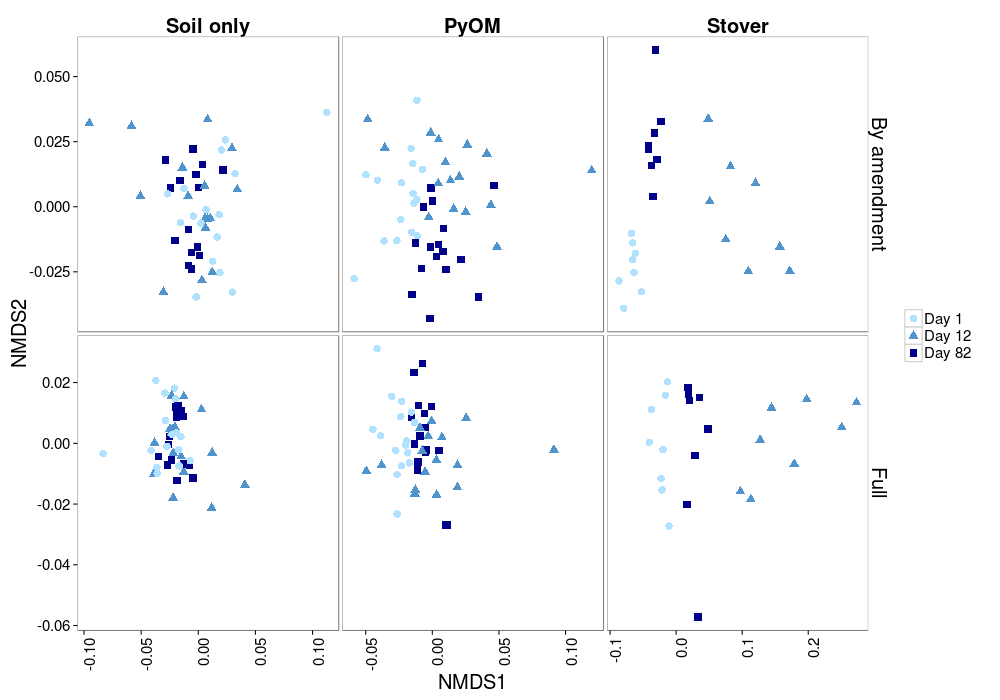

In [12]:
%%R -h 700 -w 1000
D <- NMDS.amdmts
# Sets the relevant ordination

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$ord = factor(D$ord, levels=c("Full", "By amendment"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))
#D$Strip1 = paste(D$AmdmtName)
D$Strip2 = paste(D$ord)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = DayName, shape = DayName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("lightskyblue1","steelblue3","blue4"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),
          strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15, angle = 90, hjust = 1, vjust = 1),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_text(size=15),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

# Displays the plot object
p = p + facet_grid(~Strip2~AmdmtName, scales = "free")
# The axis scales could be all optimized individually
#p = p + facet_wrap(~AmdmtName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Amendments
plot.amdmts = p
p

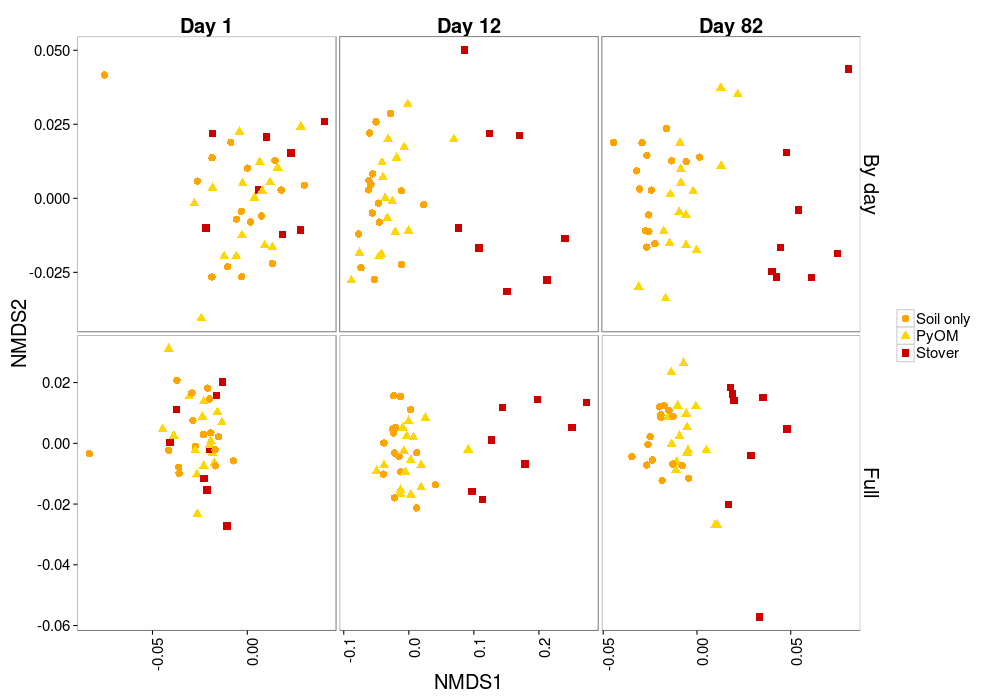

In [13]:
%%R -h 700 -w 1000
D <- NMDS.days
# Sets the relevant ordination

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$ord = factor(D$ord, levels=c("Full", "By day"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))
D$Strip2 = paste(D$ord)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = AmdmtName, shape = AmdmtName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("orange","gold1","red3"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),
          strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15, angle = 90, hjust = 1, vjust = 1),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_text(size=15),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

# Displays the plot object
p = p + facet_grid(~Strip2~DayName, scales = "free")
# The axis scales could be all optimized individually
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Amendments
plot.days = p
p

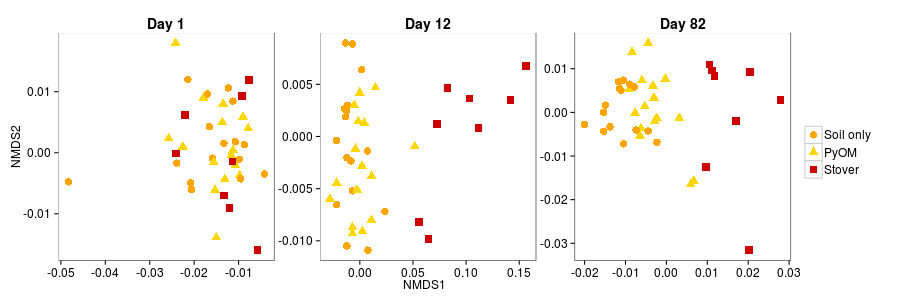

In [6]:
%%R -h 300 -w 900
D <- NMDS.full
# Sets the relevant ordination

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = AmdmtName, shape = AmdmtName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("orange","gold1","red3"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
p = p + facet_wrap(~DayName, scales="free")
# The axis scales could be all optimized individually
#p = p + facet_wrap(~DayName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
plot.full.byDay = p
p

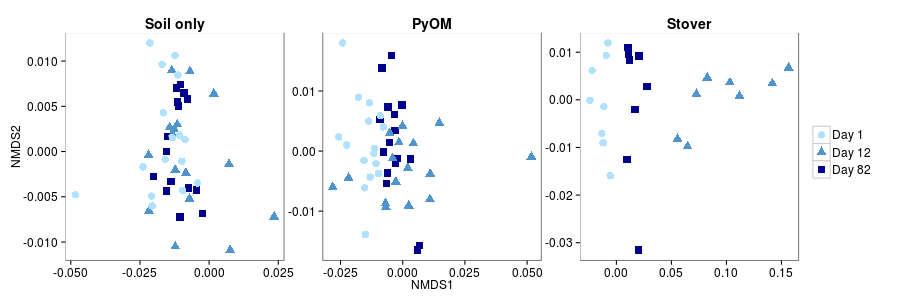

In [7]:
%%R -h 300 -w 900
D <- NMDS.full
# Sets the relevant ordination

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = DayName, shape = DayName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("lightskyblue1","steelblue3","blue4"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
p = p + facet_wrap(~AmdmtName, scales = "free")
# The axis scales could be all optimized individually
# p = p + facet_wrap(~AmdmtName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
plot.full.byAmdmt = p
p

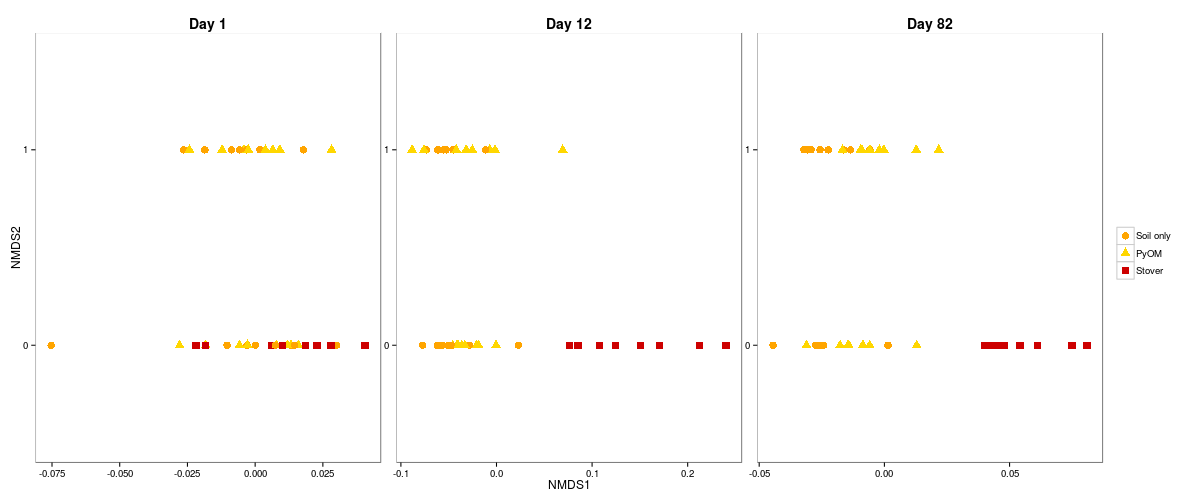

In [16]:
%%R -h 500 -w 1200
D <- ord.NMDS.days
# Sets the relevant ordination

colnames(D)[2:3]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = AmdmtName, shape = AmdmtName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("orange","gold1","red3"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
p = p + facet_wrap(~DayName, scales = "free")
# The axis scales could be all optimized individually
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
plot.byDay = p
p

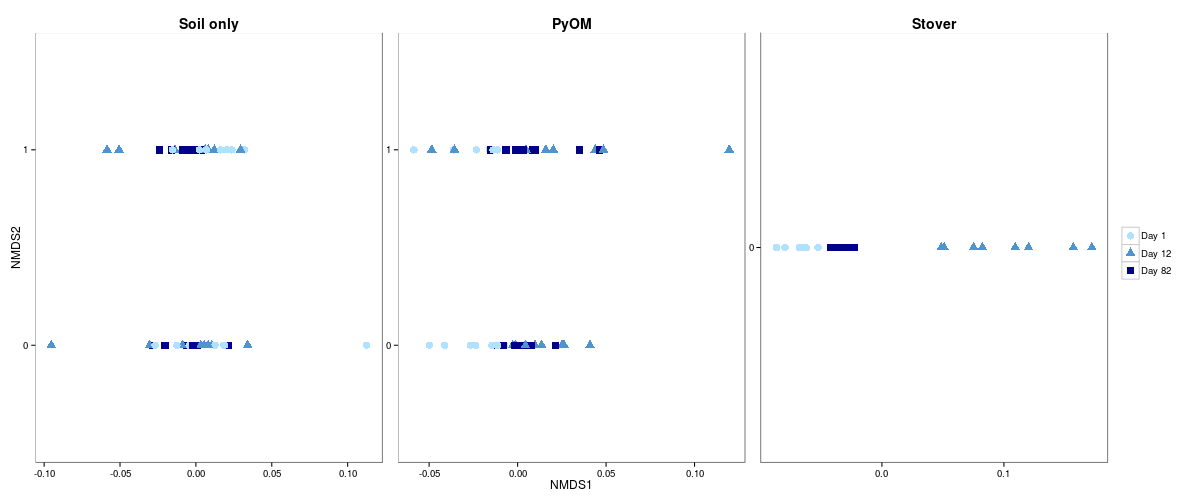

In [17]:
%%R -h 500 -w 1200
D <- ord.NMDS.amdmts
# Sets the relevant ordination

colnames(D)[2:3]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = DayName, shape = DayName))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("lightskyblue1","steelblue3","blue4"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
p = p + facet_wrap(~AmdmtName, scales = "free")
# The axis scales could be all optimized individually
# p = p + facet_wrap(~strip)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
plot.byAmdmt = p
p

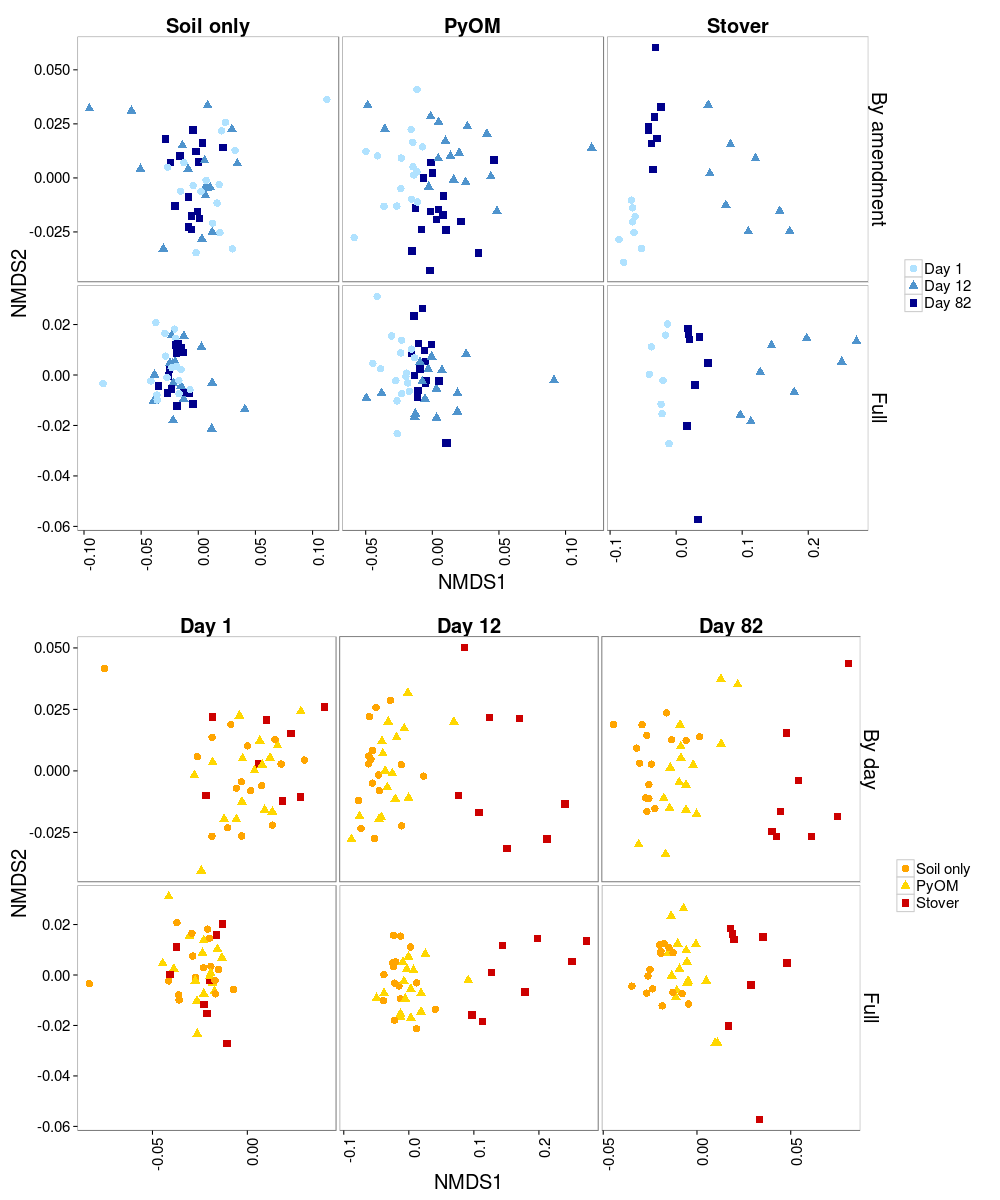

In [18]:
%%R -h 1200 -w 1000
grid.arrange(plot.amdmts, plot.days, nrow=2)

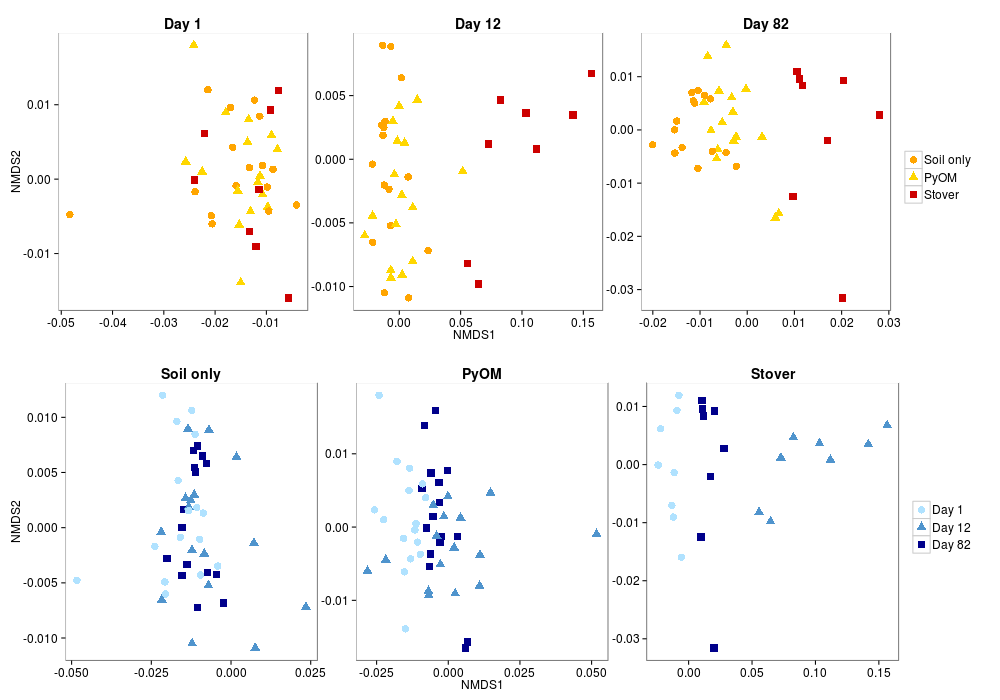

In [8]:
%%R -h 700 -w 1000
p = arrangeGrob(plot.full.byDay, plot.full.byAmdmt, nrow=2)
ggsave(filename = "NMDS.pdf", plot = p, width=10, height = 7)
p